In [1]:
!pip install Spotipy

In [1]:
import os
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_format ='retina'
import spotipy
import spotipy.util as util
from spotipy.oauth2 import SpotifyClientCredentials
from spotipy import oauth2
import random
from functools import reduce

import json, os
import traceback
import matplotlib.pyplot as plt
%matplotlib inline



In [2]:
from groupify.app.spotify_utils import get_user_top_tracks, fetch_audio_features, get_playlists_of_user, fetch_playlist_tracks 
from groupify.app.spotify_utils import create_playlist_new, enrich_playlist, fetch_playlist_tracks

In [3]:
# constants
redirect_uri = 'https://example.com'

In [4]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import spotipy.util as util

import groupify.app.psecrets as psecrets

try: 
    cid = psecrets.client_id
    secret = psecrets.secret
    userdata = json.load(open('groupify/app/json/userdata.json', 'r'))
    username = list(userdata.keys())[0]
    scope = 'user-top-read user-read-recently-played user-follow-read playlist-modify-public user-library-read playlist-read-collaborative'
    token = util.prompt_for_user_token(username, scope, client_id=cid, client_secret=secret, redirect_uri=redirect_uri)

    if token:
        sp = spotipy.Spotify(auth=token)
    else:
        print("Can't get token for", username)
except: 
    print(traceback.format_exc(5))


In [5]:
df_favorite = get_user_top_tracks(sp)
df_fav = fetch_audio_features (sp, df_favorite)


<class 'list'>


In [6]:
df_fav.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, 6tFzWFRM5n8GyMLVvzzjUB to 145BjTry1UkM3WL74UEqtt
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      50 non-null     float64
 1   acousticness      50 non-null     float64
 2   energy            50 non-null     float64
 3   tempo             50 non-null     float64
 4   instrumentalness  50 non-null     float64
 5   loudness          50 non-null     float64
 6   liveness          50 non-null     float64
 7   duration_ms       50 non-null     int64  
 8   key               50 non-null     int64  
 9   valence           50 non-null     float64
 10  speechiness       50 non-null     float64
 11  mode              50 non-null     int64  
dtypes: float64(9), int64(3)
memory usage: 5.1+ KB


/Users/tejasbot/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


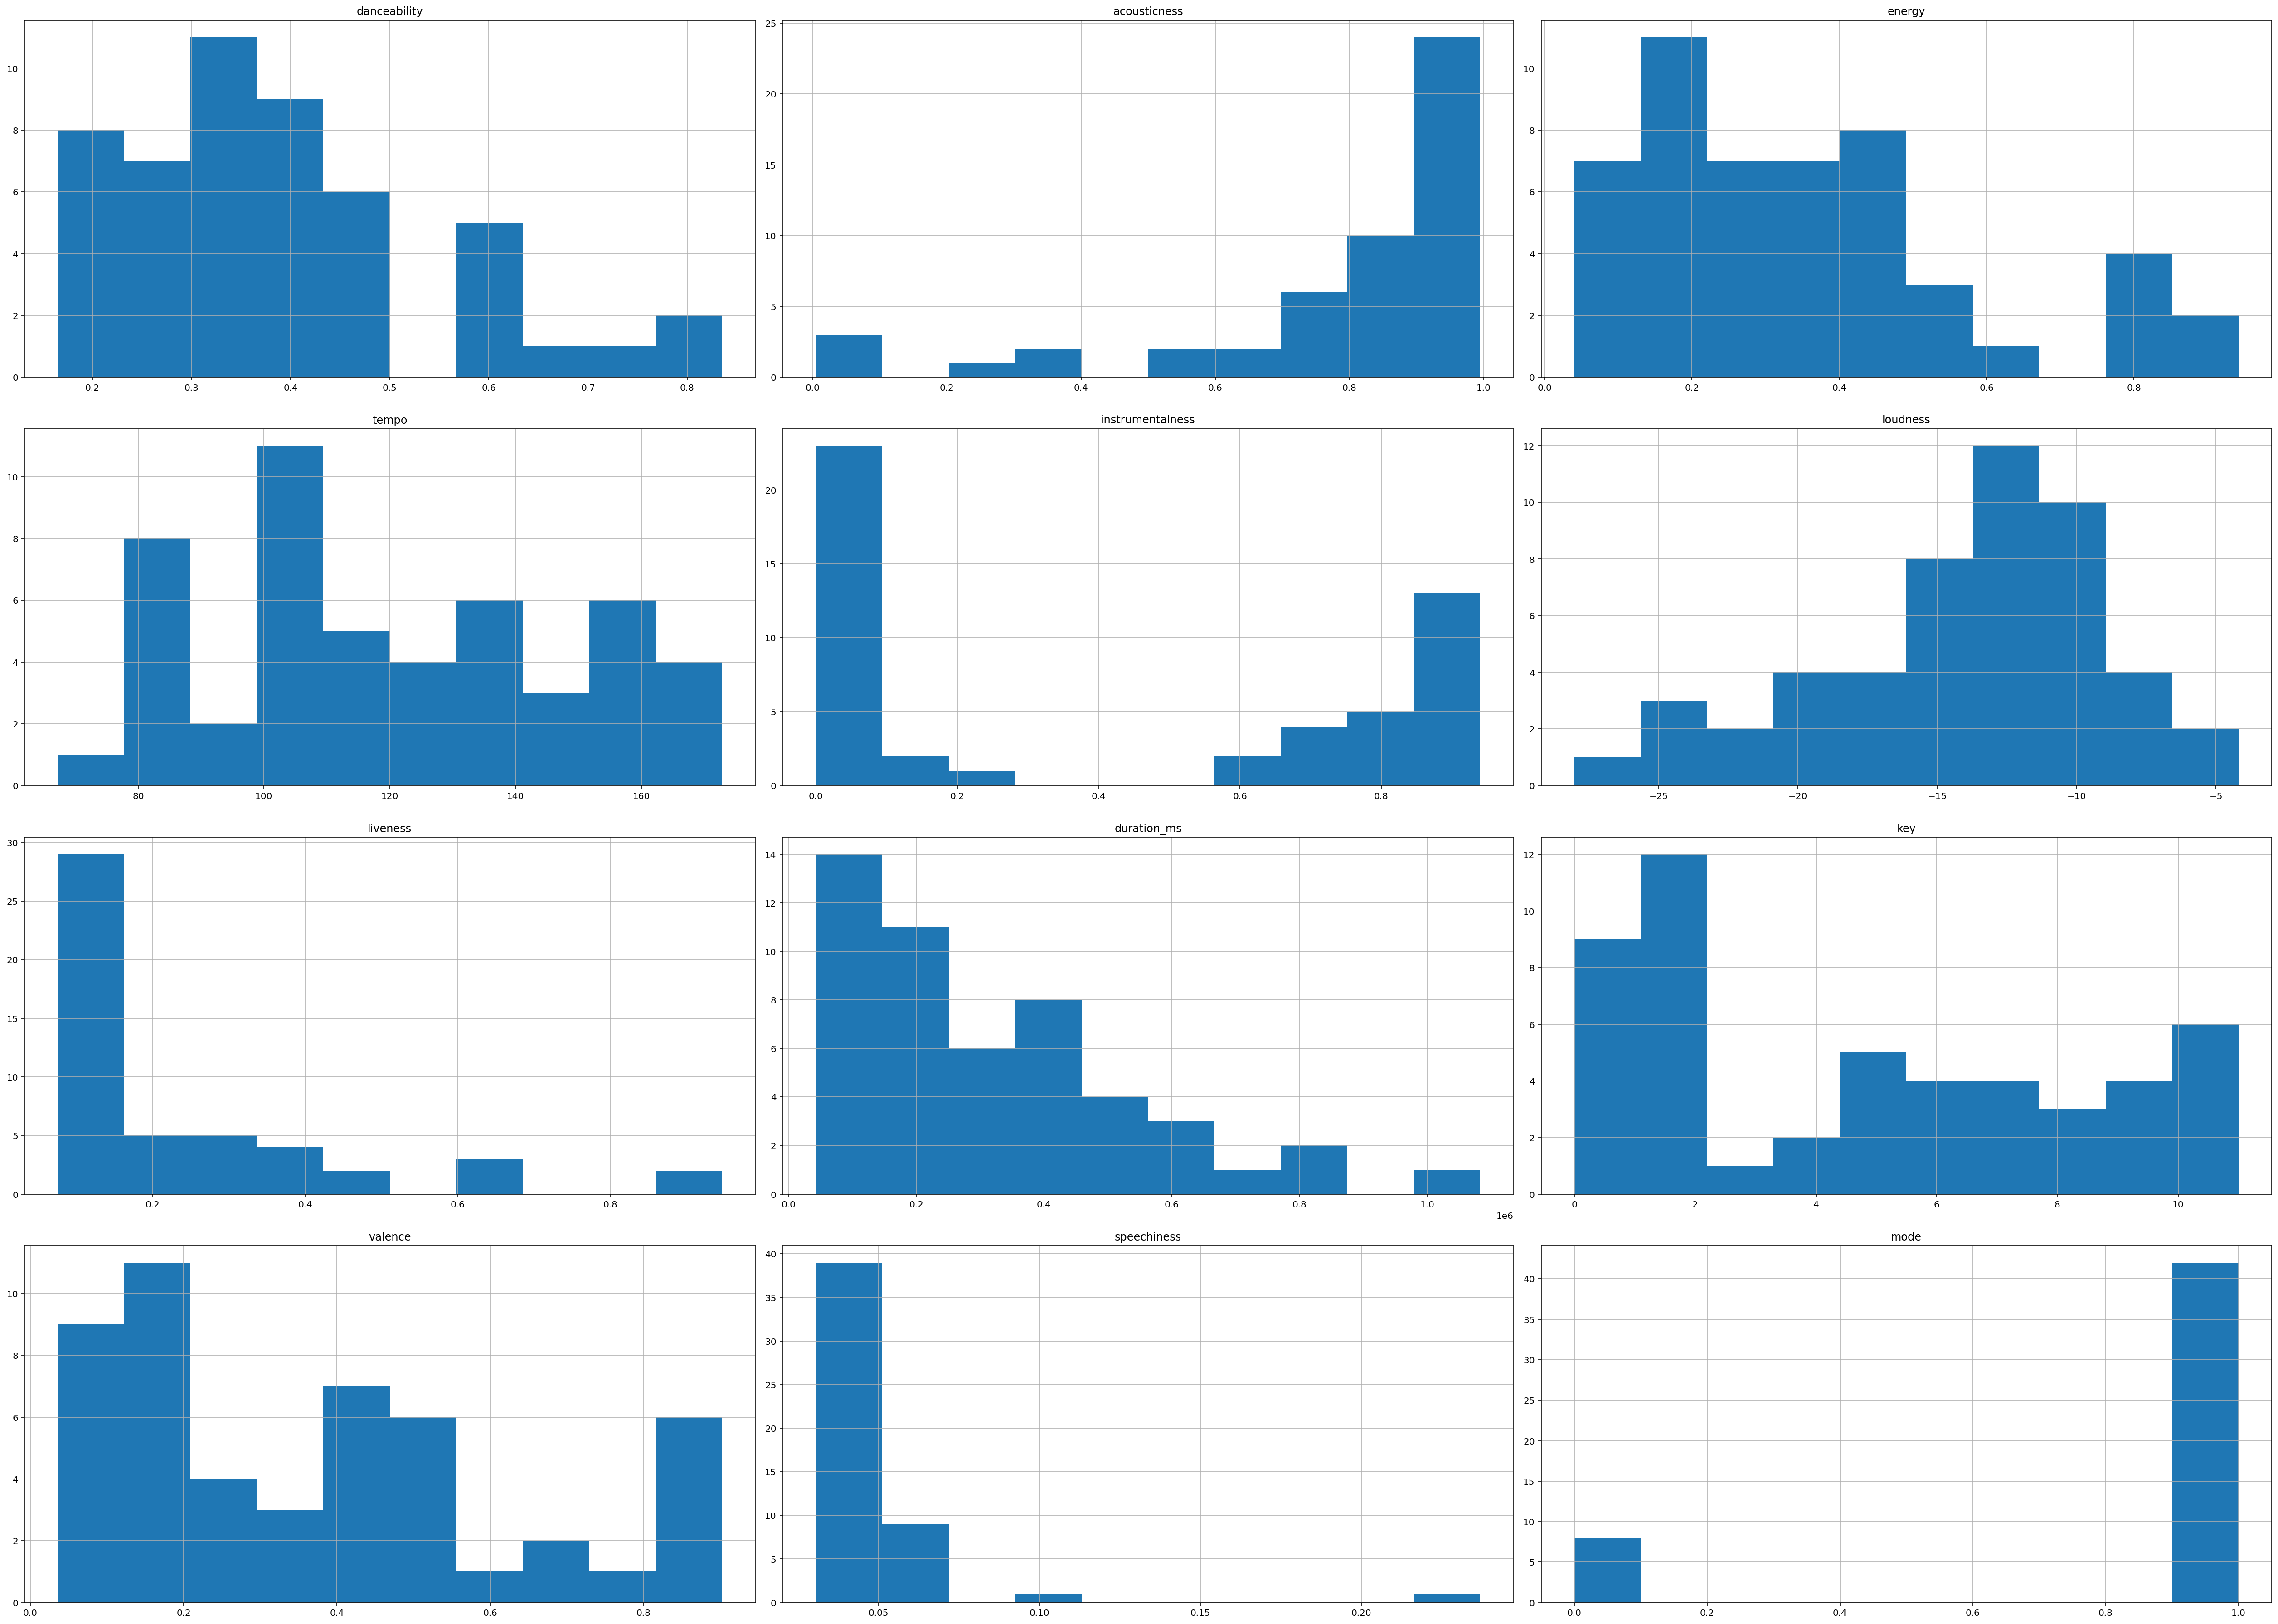

In [7]:
df_fav.hist(figsize=(35,25)) 
plt.tight_layout()
plt.show()

In [8]:
df_playlists = get_playlists_of_user(sp, username)
df_playlists

,id,name,#tracks
0,2ZSR6zt1YF8FBdfuvw6KNc,Rudra Veena,9
1,4LJMgDqw8LBDZ5ERzxfQ0g,Fanna Fi Allah,3
2,0DcztO02Tox6mIEGfbYJIr,JS Blend2,0
3,1kgaY77cpRDGhcYmVNHvdV,karaoke,1
4,72GrzHx43yw0nHa3BuAPrL,Craig Pruess and the Singers of the Art of Liv...,6
5,3PTg0gKdhPv9TPJmw60KSz,Shankar - Raga Aberi,8
6,1rTvmcaTynZIg6VqGxjphk,"Various Artists - The Best Of Carnatic Vocal, ...",14
7,6n6jIjZy2Vg9VCMx6Swv6y,Various Artists - Varnams,22
8,2OFmUyEWo5LaCfEMv5zZdR,Starred,3
9,7AR1r6RMIxZzfXp1JBvAhj,The World Players – The World Of Celtic Fiddle,26


In [9]:
from groupify.app.spotify_utils import mean_audio_features_playlist
# Merge them together
import numpy
dataframes = []
# Loop through the filenames to populate dataframes with different dataframes 
for  playlist in df_playlists['id']:
    try:
        mean_df = mean_audio_features_playlist(sp, playlist)

        if any(numpy.isnan(mean_df.values)): 
            
            print ("Skip "+playlist)
            continue
        dataframes.append(mean_df)
    except:
        print ("Skip "+playlist)

Skip 0DcztO02Tox6mIEGfbYJIr
Skip 7nFRkJjRbA7YkOBZKhpw7j


In [10]:
dataframes

[                  2ZSR6zt1YF8FBdfuvw6KNc
 danceability                3.502222e-01
 acousticness                7.993333e-01
 energy                      2.970667e-01
 tempo                       1.195447e+02
 instrumentalness            5.196667e-01
 loudness                   -1.946933e+01
 liveness                    2.737222e-01
 duration_ms                 1.191608e+06
 key                         4.111111e+00
 valence                     2.755333e-01
 speechiness                 4.655556e-02
 mode                        8.888889e-01,
                   4LJMgDqw8LBDZ5ERzxfQ0g
 danceability                    0.401333
 acousticness                    0.056270
 energy                          0.740333
 tempo                         115.697000
 instrumentalness                0.351947
 loudness                       -9.042667
 liveness                        0.540000
 duration_ms                886124.333333
 key                             4.333333
 valence                         

In [11]:
X = reduce(lambda left,right: pd.merge(left,right, left_index=True, right_index=True), dataframes)
X

,2ZSR6zt1YF8FBdfuvw6KNc,4LJMgDqw8LBDZ5ERzxfQ0g,1kgaY77cpRDGhcYmVNHvdV,72GrzHx43yw0nHa3BuAPrL,3PTg0gKdhPv9TPJmw60KSz,1rTvmcaTynZIg6VqGxjphk,6n6jIjZy2Vg9VCMx6Swv6y,2OFmUyEWo5LaCfEMv5zZdR,7AR1r6RMIxZzfXp1JBvAhj,1KkrVONQgCv9ijVE3j9NqS,5RAFOgwi4AtumrEG7KeHWH,6ZSuc73ggKacdq50SxbZwJ,5DCbt84RG5uf2DbRTzybT0,2IWxWGVN1vz4DMdh3lrKYZ,0XcJjckAXfv02QfQkqFkXr
danceability,3.502222e-01,0.401333,0.4440,0.201517,0.476125,0.392143,0.416909,5.193333e-01,0.319973,0.312750,0.472545,0.276280,0.583000,0.384880,0.519615
acousticness,7.993333e-01,0.056270,0.7350,0.916000,0.520666,0.819929,0.743591,6.976667e-01,0.878500,0.933375,0.644514,0.931260,0.337651,0.621880,0.546077
energy,2.970667e-01,0.740333,0.5910,0.170167,0.503000,0.525071,0.603455,6.176667e-01,0.193335,0.293625,0.418709,0.140611,0.585000,0.657240,0.705923
tempo,1.195447e+02,115.697000,82.9520,98.088667,85.087875,137.577071,138.897864,1.657390e+02,94.847115,125.991625,113.842591,97.705160,115.918909,121.264760,129.372000
instrumentalness,5.196667e-01,0.351947,0.0000,0.002140,0.765750,0.017584,0.035878,1.668022e-01,0.318358,0.496907,0.479289,0.765331,0.189196,0.472464,0.736493
loudness,-1.946933e+01,-9.042667,-10.0020,-16.691667,-13.549250,-11.447143,-9.954318,-8.768667e+00,-18.276115,-16.181875,-11.626500,-20.584510,-10.165909,-11.095280,-20.577538
liveness,2.737222e-01,0.540000,0.0734,0.123450,0.201500,0.175486,0.211655,1.573333e-01,0.140604,0.201625,0.177473,0.148308,0.193027,0.329392,0.130354
duration_ms,1.191608e+06,886124.333333,271581.0000,686155.333333,364161.625000,577384.785714,427728.272727,1.273367e+06,152876.884615,493813.125000,152609.000000,420948.270000,328276.363636,688347.520000,400993.846154
key,4.111111e+00,4.333333,1.0000,5.000000,9.500000,5.785714,6.318182,5.000000e+00,5.538462,4.250000,4.000000,4.950000,4.818182,4.440000,2.846154
valence,2.755333e-01,0.727333,0.5870,0.129333,0.579125,0.475643,0.651364,4.746667e-01,0.623769,0.171613,0.495809,0.193686,0.375909,0.501736,0.673385


In [12]:
Y = pd.DataFrame(df_fav.median(), columns= ['fav_playlist'])
Y= Y.drop('mode')
Y

,fav_playlist
danceability,0.3560
acousticness,0.8835
energy,0.3230
tempo,113.8445
instrumentalness,0.2040
loudness,-12.8645
liveness,0.1255
duration_ms,253373.5000
key,5.0000
valence,0.3135


In [13]:
# Analyze feature importances
from sklearn.ensemble._forest import RandomForestRegressor
# Can combine step above with this
forest = RandomForestRegressor(n_estimators=10)#random_state=42, max_depth=2, max_features=9) 
forest.fit(X,Y.values.ravel())
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]
# Print the feature rankings
print("Playlist ranking:")
  
for f in range(len(importances)):
    playlist_name = df_playlists[df_playlists['id']==X.columns[indices[f]]]['name'].values[0]
    
    print("%d. %s %s %f " % (f + 1, 
            X.columns[indices[f]],
            playlist_name,
            importances[indices[f]]))

Playlist ranking:
1. 1rTvmcaTynZIg6VqGxjphk Various Artists - The Best Of Carnatic Vocal, Vol. 1 & 2 0.200001 
2. 2OFmUyEWo5LaCfEMv5zZdR Starred 0.197893 
3. 1kgaY77cpRDGhcYmVNHvdV karaoke 0.100268 
4. 5DCbt84RG5uf2DbRTzybT0 Saashwathi Prabhu – Mystic Journey 0.100033 
5. 2ZSR6zt1YF8FBdfuvw6KNc Rudra Veena 0.100005 
6. 0XcJjckAXfv02QfQkqFkXr Zakir Hussain – Rhythmic Impressions Of Ustad Zakir Hussain 0.100000 
7. 4LJMgDqw8LBDZ5ERzxfQ0g Fanna Fi Allah  0.099992 
8. 3PTg0gKdhPv9TPJmw60KSz Shankar - Raga Aberi 0.091186 
9. 6ZSuc73ggKacdq50SxbZwJ Antonio Vivaldi – 100 Pieces of Classical Music For Your Brain 0.009687 
10. 6n6jIjZy2Vg9VCMx6Swv6y Various Artists - Varnams 0.000461 
11. 72GrzHx43yw0nHa3BuAPrL Craig Pruess and the Singers of the Art of Living - Sacred Chants of Shiva 0.000458 
12. 7AR1r6RMIxZzfXp1JBvAhj The World Players – The World Of Celtic Fiddle 0.000008 
13. 5RAFOgwi4AtumrEG7KeHWH The Darjeeling Limited 0.000006 
14. 2IWxWGVN1vz4DMdh3lrKYZ Moodagent - Lehar Remix - Raag D

In [14]:
for i, playlist in enumerate(df_playlists['id']):
    try:
        string_command = "df_{} = fetch_audio_features(sp, playlist)".format(playlist)
        print("Create {}".format(string_command))
        exec(string_command)
    except:
        print("playlist with id {} is not valid, skiping ".format(playlist))
        pass


frames = []
for i, playlist in enumerate(df_playlists['id']):
    try:
        string_command = "frames.append(df_{})".format(playlist)
        print("Create {}".format(string_command))
        exec(string_command)
    except:
        print("playlist with id {} is not valid, skiping ".format(playlist))
        pass
print (frames)
df =pd.concat(frames)
df.drop_duplicates()
df = df.set_index(['track_id'])



Create df_2ZSR6zt1YF8FBdfuvw6KNc = fetch_audio_features(sp, playlist)
Create df_4LJMgDqw8LBDZ5ERzxfQ0g = fetch_audio_features(sp, playlist)
Create df_0DcztO02Tox6mIEGfbYJIr = fetch_audio_features(sp, playlist)
Create df_1kgaY77cpRDGhcYmVNHvdV = fetch_audio_features(sp, playlist)
Create df_72GrzHx43yw0nHa3BuAPrL = fetch_audio_features(sp, playlist)
Create df_3PTg0gKdhPv9TPJmw60KSz = fetch_audio_features(sp, playlist)
Create df_1rTvmcaTynZIg6VqGxjphk = fetch_audio_features(sp, playlist)
Create df_6n6jIjZy2Vg9VCMx6Swv6y = fetch_audio_features(sp, playlist)
Create df_2OFmUyEWo5LaCfEMv5zZdR = fetch_audio_features(sp, playlist)
Create df_7AR1r6RMIxZzfXp1JBvAhj = fetch_audio_features(sp, playlist)
Create df_1KkrVONQgCv9ijVE3j9NqS = fetch_audio_features(sp, playlist)
Create df_5RAFOgwi4AtumrEG7KeHWH = fetch_audio_features(sp, playlist)
Create df_6ZSuc73ggKacdq50SxbZwJ = fetch_audio_features(sp, playlist)
Create df_5DCbt84RG5uf2DbRTzybT0 = fetch_audio_features(sp, playlist)
Create df_2IWxWGVN1v

KeyError: "None of ['track_id'] are in the columns"

In [15]:
df

,danceability,acousticness,energy,tempo,instrumentalness,loudness,liveness,duration_ms,key,valence,speechiness,mode
track_id,,,,,,,,,,,,
1v7hb0IjIyzmeaDJy6lsB5,0.242,0.962,0.0326,113.674,0.635,-23.106,0.1050,1476440,9,0.0473,0.0378,1
6Ek6YcYWgpDctbMgnShcfG,0.194,0.906,0.1870,128.961,0.511,-14.261,0.6510,2212747,9,0.0394,0.0386,1
4THJEw7GSeFCBoWxLbWdPC,0.333,0.497,0.5250,142.456,0.784,-11.218,0.6880,1056120,4,0.2460,0.0476,1
0a4OxCTdwnJ8P2ni1u4yV5,0.306,0.888,0.2360,88.276,0.487,-19.389,0.0645,1418560,0,0.0811,0.0362,1
3pojxH8ZwVWPv71O7xoHtp,0.481,0.768,0.3210,103.676,0.561,-22.384,0.0657,920067,2,0.3820,0.0460,0
...,...,...,...,...,...,...,...,...,...,...,...,...
64Wf0OnCvdq2uVxrUCJOsq,0.499,0.133,0.8390,141.027,0.765,-22.837,0.0883,191797,1,0.9580,0.1170,1
14EYVKNIgesnKeaq92b8Zd,0.509,0.481,0.8910,139.575,0.905,-22.596,0.0564,219707,8,0.6590,0.0784,1
5dJEx7XVIMB8H5yhrxzJkd,0.461,0.898,0.7340,148.379,0.881,-15.966,0.0974,212555,1,0.6250,0.0739,1


In [16]:
Y= Y.squeeze('columns')
Y = Y.sort_index( axis=0, level=None, ascending=True, inplace=False, kind='quicksort')
Y

acousticness             0.8835
danceability             0.3560
duration_ms         253373.5000
energy                   0.3230
instrumentalness         0.2040
key                      5.0000
liveness                 0.1255
loudness               -12.8645
mode                     1.0000
speechiness              0.0410
tempo                  113.8445
valence                  0.3135
Name: fav_playlist, dtype: float64

In [29]:
std_dev = pd.DataFrame(df_fav.std(), columns= ['fav_playlist'])
std_dev

,fav_playlist
danceability,0.161335
acousticness,0.258822
energy,0.233836
tempo,28.651836
instrumentalness,0.413918
loudness,5.159187
liveness,0.210318
duration_ms,231543.581909
key,3.432676
valence,0.258780


In [17]:
# Subtract mean of the favorite plalyist from the top 3 playlist 
df1= df.subtract(Y, axis='columns') 
df1

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence
track_id,,,,,,,,,,,,
1v7hb0IjIyzmeaDJy6lsB5,0.0785,-0.114,1.22307e+06,-0.2904,0.431,4,-0.0205,-10.2415,0,-0.0032,-0.1705,-0.2662
6Ek6YcYWgpDctbMgnShcfG,0.0225,-0.162,1.95937e+06,-0.1360,0.307,4,0.5255,-1.3965,0,-0.0024,15.1165,-0.2741
4THJEw7GSeFCBoWxLbWdPC,-0.3865,-0.023,802746,0.2020,0.580,-1,0.5625,1.6465,0,0.0066,28.6115,-0.0675
0a4OxCTdwnJ8P2ni1u4yV5,0.0045,-0.050,1.16519e+06,-0.0870,0.283,-5,-0.0610,-6.5245,0,-0.0048,-25.5685,-0.2324
3pojxH8ZwVWPv71O7xoHtp,-0.1155,0.125,666694,-0.0020,0.357,-3,-0.0598,-9.5195,-1,0.0050,-10.1685,0.0685
...,...,...,...,...,...,...,...,...,...,...,...,...
64Wf0OnCvdq2uVxrUCJOsq,-0.7505,0.143,-61576.5,0.5160,0.561,-4,-0.0372,-9.9725,0,0.0760,27.1825,0.6445
14EYVKNIgesnKeaq92b8Zd,-0.4025,0.153,-33666.5,0.5680,0.701,3,-0.0691,-9.7315,0,0.0374,25.7305,0.3455
5dJEx7XVIMB8H5yhrxzJkd,0.0145,0.105,-40818.5,0.4110,0.677,-4,-0.0281,-3.1015,0,0.0329,34.5345,0.3115


In [31]:
## this operation needs to be performed with standard deviation, not median. 
df1= df1.divide(Y, axis='columns') ## not sure if this has to be fixed!
# df1

In [19]:
# df1 = df1.drop(['instrumentalness'], axis=1)

In [20]:
# Add all the score 
df1['variation'] = df1.sum(axis=1)
# take the absoulte of the variatio
df1['variation'] = df1['variation'].abs()
df1 = df1.drop_duplicates()
df1

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,variation
track_id,,,,,,,,,,,,,
1v7hb0IjIyzmeaDJy6lsB5,0.0785,-0.114,1.22307e+06,-0.2904,0.431,4,-0.0205,-10.2415,0,-0.0032,-0.1705,-0.2662,1.223060e+06
6Ek6YcYWgpDctbMgnShcfG,0.0225,-0.162,1.95937e+06,-0.1360,0.307,4,0.5255,-1.3965,0,-0.0024,15.1165,-0.2741,1.959392e+06
4THJEw7GSeFCBoWxLbWdPC,-0.3865,-0.023,802746,0.2020,0.580,-1,0.5625,1.6465,0,0.0066,28.6115,-0.0675,8.027766e+05
0a4OxCTdwnJ8P2ni1u4yV5,0.0045,-0.050,1.16519e+06,-0.0870,0.283,-5,-0.0610,-6.5245,0,-0.0048,-25.5685,-0.2324,1.165149e+06
3pojxH8ZwVWPv71O7xoHtp,-0.1155,0.125,666694,-0.0020,0.357,-3,-0.0598,-9.5195,-1,0.0050,-10.1685,0.0685,6.666702e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...
64Wf0OnCvdq2uVxrUCJOsq,-0.7505,0.143,-61576.5,0.5160,0.561,-4,-0.0372,-9.9725,0,0.0760,27.1825,0.6445,6.156214e+04
14EYVKNIgesnKeaq92b8Zd,-0.4025,0.153,-33666.5,0.5680,0.701,3,-0.0691,-9.7315,0,0.0374,25.7305,0.3455,3.364617e+04
5dJEx7XVIMB8H5yhrxzJkd,0.0145,0.105,-40818.5,0.4110,0.677,-4,-0.0281,-3.1015,0,0.0329,34.5345,0.3115,4.078954e+04


In [21]:
# Now we have the variation, we will take the songs with the least variation 
df2 = df1.nsmallest(50,'variation', keep='first')
df2

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,variation
track_id,,,,,,,,,,,,,
34A7Mhcx9MtYzg1gKelDPH,-0.0125,0.0350,293.5,0.2900,0.690000,5,0.0725,0.6905,-1,0.0079,-26.2595,0.2035,273.217400
0iJIu3DQ3pd0UgYErNYrxC,-0.0575,0.1270,1302.5,0.3050,0.733000,0,-0.0416,-5.6635,-1,0.0551,36.7595,0.1385,1333.855500
4ksGuAeANt8PnrIfmPgTRO,0.0435,-0.1520,-2186.5,-0.1850,0.732000,2,-0.0005,-5.0325,0,0.0009,-1.6705,-0.2334,2190.997500
4WnxBVhWBcM8z6GRscabSm,0.0925,-0.1530,-2600.5,-0.2450,0.424000,2,-0.0293,-9.2825,0,0.0023,-32.9175,-0.1285,2640.737000
0JwSo7FRo1bPRp2IP3kJgM,-0.1165,0.0270,2733.5,0.5970,0.735000,-3,-0.0484,7.5035,0,0.0249,-3.9255,0.6115,2735.908500
6anG7aR0p9enoBrwQybI4A,-0.2595,0.2480,4266.5,0.1080,-0.182700,-5,-0.0482,1.2465,-1,-0.0027,0.1045,0.1985,4261.912400
6ZilcYUIICcj8ihQ165irs,-0.4115,0.2040,5773.5,0.4650,0.496000,-3,0.0315,4.5515,0,-0.0085,-15.9095,0.4725,5760.391000
0NoooClEgxqlqb4A5NBx9a,-0.1215,0.1210,-8346.5,0.1430,0.737000,3,0.0485,1.3435,0,0.0060,-30.4125,0.2745,8371.360500
4wcBlgP2YgOqoXzupVT8rb,0.1125,0.0250,-9173.5,-0.3126,0.714000,-4,-0.0452,-20.5925,0,0.0003,-19.4775,-0.1625,9217.238500


In [22]:
new_playlist_id = create_playlist_new(sp,  'JS Blend2', 'Test playlist created using python!')

In [23]:
get_playlists_of_user(sp,username)

,id,name,#tracks
0,5CFcnYnuiiKhfK6TD1jRxS,JS Blend2,0
1,2ZSR6zt1YF8FBdfuvw6KNc,Rudra Veena,9
2,4LJMgDqw8LBDZ5ERzxfQ0g,Fanna Fi Allah,3
3,0DcztO02Tox6mIEGfbYJIr,JS Blend2,0
4,1kgaY77cpRDGhcYmVNHvdV,karaoke,1
5,72GrzHx43yw0nHa3BuAPrL,Craig Pruess and the Singers of the Art of Liv...,6
6,3PTg0gKdhPv9TPJmw60KSz,Shankar - Raga Aberi,8
7,1rTvmcaTynZIg6VqGxjphk,"Various Artists - The Best Of Carnatic Vocal, ...",14
8,6n6jIjZy2Vg9VCMx6Swv6y,Various Artists - Varnams,22
9,2OFmUyEWo5LaCfEMv5zZdR,Starred,3


In [24]:
list_track = df2.index

In [25]:
enrich_playlist(sp, username, new_playlist_id, list_track) #playlist id

In [26]:
get_playlists_of_user(sp,username)

,id,name,#tracks
0,5CFcnYnuiiKhfK6TD1jRxS,JS Blend2,50
1,2ZSR6zt1YF8FBdfuvw6KNc,Rudra Veena,9
2,4LJMgDqw8LBDZ5ERzxfQ0g,Fanna Fi Allah,3
3,0DcztO02Tox6mIEGfbYJIr,JS Blend2,0
4,1kgaY77cpRDGhcYmVNHvdV,karaoke,1
5,72GrzHx43yw0nHa3BuAPrL,Craig Pruess and the Singers of the Art of Liv...,6
6,3PTg0gKdhPv9TPJmw60KSz,Shankar - Raga Aberi,8
7,1rTvmcaTynZIg6VqGxjphk,"Various Artists - The Best Of Carnatic Vocal, ...",14
8,6n6jIjZy2Vg9VCMx6Swv6y,Various Artists - Varnams,22
9,2OFmUyEWo5LaCfEMv5zZdR,Starred,3


In [28]:
fetch_playlist_tracks(sp, new_playlist_id)

,track_id,track_name
0,34A7Mhcx9MtYzg1gKelDPH,Raga Aberi Track 03
1,0iJIu3DQ3pd0UgYErNYrxC,Double Dayan
2,4ksGuAeANt8PnrIfmPgTRO,"Xerxes, Act 1: ""Ombra mai fu"""
3,4WnxBVhWBcM8z6GRscabSm,Sialh Na Mban / Winnie's Air
4,0JwSo7FRo1bPRp2IP3kJgM,Lehar Remix - Raag Desh
5,6anG7aR0p9enoBrwQybI4A,Mèlange (Raag Bhimplas)
6,6ZilcYUIICcj8ihQ165irs,Powerman
7,0NoooClEgxqlqb4A5NBx9a,Raga Aberi Track 02
8,4wcBlgP2YgOqoXzupVT8rb,"Fantasy Pieces, Op. 12: Des Abends (The Evening)"
9,5YsUCWWe7pdnJO43Yj7TFh,Raga Hemant Gat In Drut Teental
